## EDA

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras import models,layers

dftrain_raw = pd.read_csv('train.csv')

In [2]:
dftrain_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


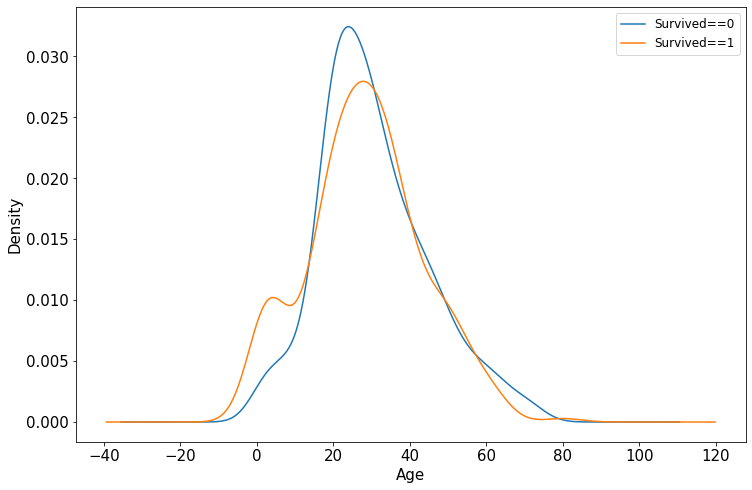

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw.query('Survived == 0')['Age'].plot(kind = 'density',
                      figsize = (12,8),fontsize=15)
dftrain_raw.query('Survived == 1')['Age'].plot(kind = 'density',
                      figsize = (12,8),fontsize=15)
ax.legend(['Survived==0','Survived==1'],fontsize = 12)
ax.set_ylabel('Density',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()

In [5]:
#the best way to process each column is to create an empty one, then for each col, process it and add it.
def preprocessing(dfdata):

    dfresult= pd.DataFrame()

    #Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' +str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult,dfPclass],axis = 1)

    #Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex],axis = 1)

    #Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    #SibSp,Parch,Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    #Carbin
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')

    #Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1)

    return(dfresult)

## MODEL IN 3 WAYS

In [ ]:


# 1 first way
tf.keras.backend.clear_session()
model = models.Sequential()

model.add(layers.Conv2D(input_shape=(64,64,3), filters = 32, kernel_size = 3,
                       activation='relu', kernel_initializer='he_uniform', 
                        name='input_layer'))
model.add(layers.Cov2D(filters = 32, kernel_size = 3, activation = 'relu', 
                kernel_initializer = 'he_uniform', name = 'conv_1_2)
                
model.add(layers.MaxPool2D(pool_size = 2, name = 'max_pool_1))
model.add(layers.Flatten(name = 'flatten'))
model.add(layers.Dense(20, activation = 'softmax', name='logit'))#input_shape(15,))) 
                       #the first layer should indicate the input shape
model.summary()

In [ ]:
#2 second way
input = layers.input(shape=(64,64,3), name = 'input')
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                 name = 'conv1d')(input)
x = layers.MaxPool2D(pool_size=2, name = 'max_pool')(x)
x = layers.Flatten(name = 'flatten')(x)
output = layers.Dense(units=6, activation='softmax', name = 'logit')(x)
model = models.Model(inputs=input, outputs = output)

In [ ]:
#3 third way
class MyModel(models.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = layers.Conv1DConv2D(input_shape = (64, 64, 3),
                     filters = 32, kernel_size = 3, activation = 'relu',
                     name = 'con_1_1')
        self.conv2 = layers.Conv2D(filters = 32, kernel_size = 3,
                    activation = 'relu', name = 'conv_1_2')

        self.max_pool_1 = MaxPool2D(pool.size = 2, name = 'max_pool_1')

        self.dense =  Dense(units = 6, activation = "softmax", name = 'logit')
    def call(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
        ...
        return x
model = MyModel()

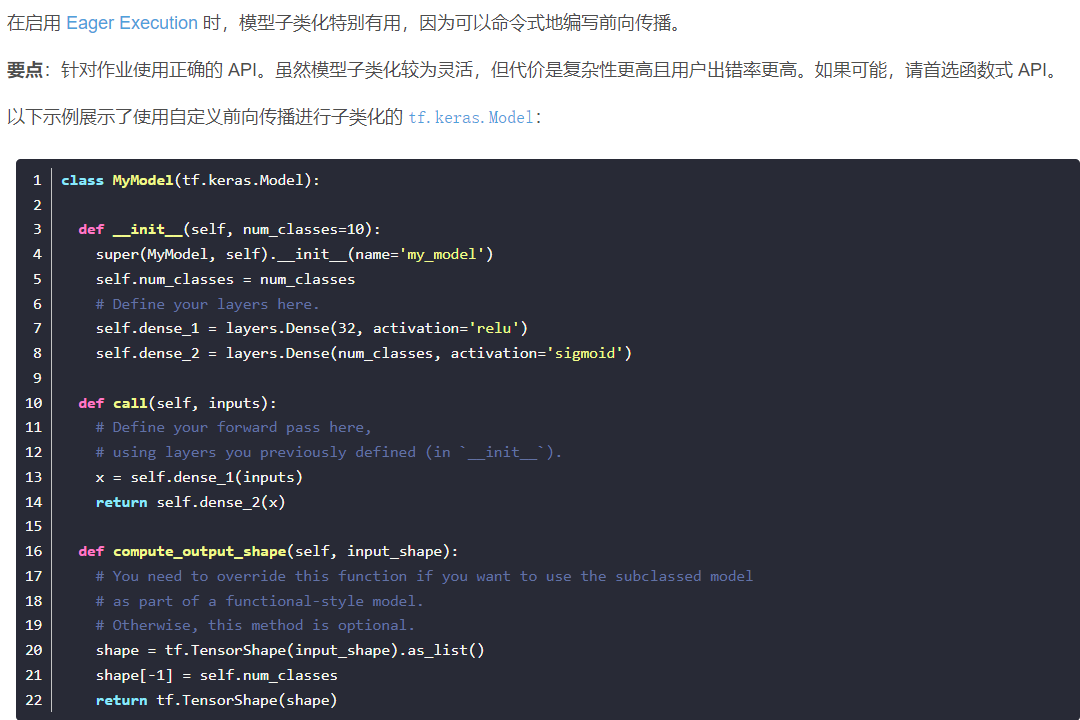

# 自定义层

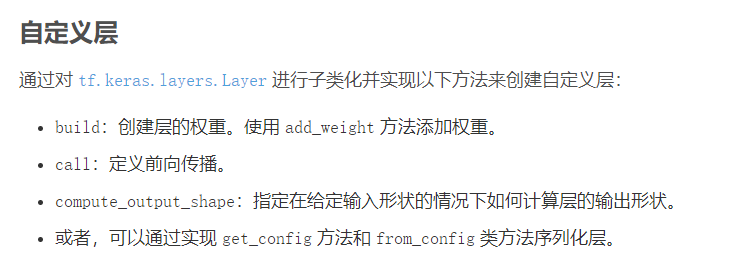

如果自定义模型层没有需要被训练的参数，一般推荐使用Lamda层实现。

如果自定义模型层有需要被训练的参数，则可以通过对Layer基类子类化实现。

Lambda层由于没有需要被训练的参数，只需要定义正向传播逻辑即可，使用比Layer基类子类化更加简单。

Lambda层的正向逻辑可以使用Python的lambda函数来表达，也可以用def关键字定义函数来表达。

In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models,regularizers

mypower = layers.Lambda(lambda x:tf.math.pow(x,2))
mypower(tf.range(5))

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([ 0,  1,  4,  9, 16])>

In [2]:
class Linear(layers.Layer):
    def __init__(self, units=32, **kwargs):
        super(Linear, self).__init__(**kwargs)
        self.units = units
    
    #build方法一般定义Layer需要被训练的参数。    
    def build(self, input_shape): 
        self.w = self.add_weight("w",shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True) #注意必须要有参数名称"w",否则会报错
        self.b = self.add_weight("b",shape=(self.units,),
                                 initializer='random_normal',
                                 trainable=True)
        super(Linear,self).build(input_shape) # 相当于设置self.built = True

    #call方法一般定义正向传播运算逻辑，__call__方法调用了它。  
    @tf.function
    def call(self, inputs): 
        return tf.matmul(inputs, self.w) + self.b
    
    #如果要让自定义的Layer通过Functional API 组合成模型时可以被保存成h5模型，需要自定义get_config方法。
    def get_config(self):  
        config = super(Linear, self).get_config()
        config.update({'units': self.units})
        return config

In [ ]:
linear = Linear(units = 16)
print(linear.built)
#如果built = False，调用__call__时会先调用build方法, 再调用call方法。
linear(tf.random.uniform((100,64))) 
print(linear.built)
config = linear.get_config()
print(config)

In [ ]:
tf.keras.backend.clear_session()

model = models.Sequential()
#注意该处的input_shape会被模型加工，无需使用None代表样本数量维
model.add(Linear(units = 1,input_shape = (2,)))  
print("model.input_shape: ",model.input_shape)
print("model.output_shape: ",model.output_shape)
model.summary()

In [ ]:

# 保存成 h5模型
model.save("./data/linear_model.h5",save_format = "h5")
model_loaded_keras = tf.keras.models.load_model(
    "./data/linear_model.h5",custom_objects={"Linear":Linear})
print(model_loaded_keras.predict(tf.constant([[3.0,2.0],[4.0,5.0]])))


# 保存成 tf模型
model.save("./data/linear_model",save_format = "tf")
model_loaded_tf = tf.keras.models.load_model("./data/linear_model")
print(model_loaded_tf.predict(tf.constant([[3.0,2.0],[4.0,5.0]])))

In [ ]:
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['AUC'])

history = model.fit(x_train,y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2 #分割一部分训练数据用于验证
                   )


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
plot_metric(history,"loss")
plot_metric(history,"AUC")

In [ ]:
#save
# 保存权重，该方式仅仅保存权重张量
model.save_weights('./data/tf_model_weights.ckpt',save_format = "tf")

In [ ]:
# 保存模型结构与模型参数到文件,该方式保存的模型具有跨平台性便于部署

model.save('./data/tf_model_savedmodel', save_format="tf")
print('export saved model.')

model_loaded = tf.keras.models.load_model('./data/tf_model_savedmodel')
model_loaded.evaluate(x_test,y_test)